<a href="https://colab.research.google.com/github/cuongcodeF4/Artificial-Intelligence/blob/main/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()

In [2]:
x_train.shape


(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
x_test.shape

(10000, 28, 28)

So nay la: 2


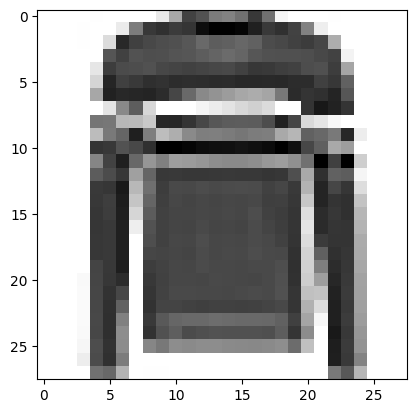

In [6]:
import matplotlib.pyplot as plt
hinh= x_train[5]   #Lấy hình ở vị trí thứ 5
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show
print("So nay la:",y_train[5])

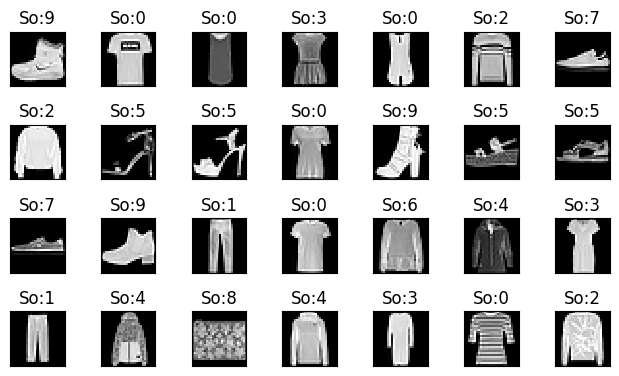

In [8]:
for i in range(28):
  plt.subplot(5,7,i+1)  # 2 hàng 5 cột 
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title("So:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [9]:
from keras.models import Sequential
from keras.layers import Dense

model= Sequential()
model.add(Dense(512, input_shape = (28*28,), activation = 'relu'))
model.add(Dense(10,activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
x_train = x_train.reshape((60000,28*28))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [12]:
from keras.utils import to_categorical #Lệnh chuyển qua 

y_train = to_categorical(y_train, 10) #10 kênh 
y_test = to_categorical(y_test, 10)

In [13]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 100, batch_size= 128) # Mỗi lần học chỉ 128 dữ liệu, không học hết 60000 dữ liệu , học tổng cộng 10 lần
test_loss, test_acc = model.evaluate(x_test,y_test)
print('test_accuracy:',test_acc)
print('test_loss:',test_loss)
model.save('model_fashion_mnist.h5')

Epoch 1/100
469/469 [==============================] - 6s 11ms/step - loss: 0.5698 - accuracy: 0.7987
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 0.3868 - accuracy: 0.8582
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.3422 - accuracy: 0.8740
Epoch 4/100
469/469 [==============================] - 5s 11ms/step - loss: 0.3141 - accuracy: 0.8842
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2971 - accuracy: 0.8900
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2805 - accuracy: 0.8952
Epoch 7/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2671 - accuracy: 0.9011
Epoch 8/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2557 - accuracy: 0.9035
Epoch 9/100
469/469 [==============================] - 5s 10ms/step - loss: 0.2450 - accuracy: 0.9096
Epoch 10/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2355 - a

1/1 [==============================] - 0s 94ms/step


array([5])

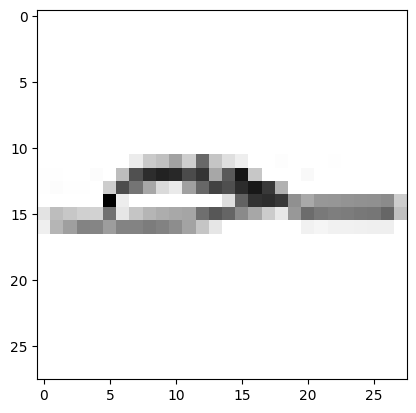

In [20]:
import numpy as np
from keras.utils.image_utils import img_to_array 
import matplotlib.pyplot as plt

hinh_test=x_test[8]   #Lấy hình ở vị trí thứ 88
plt.imshow(hinh_test,cmap=plt.cm.binary)
plt.show
hinh_test= img_to_array(hinh_test)
hinh_test =hinh_test.reshape(1,28*28)
hinh_test = hinh_test.astype('float32')
hinh_test = hinh_test /255
np.argmax(model.predict(hinh_test),axis=-1)